# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Overall Trends
### 1: The max temperature is felt closest to the equator, which is not too shocking.
### 2: As you move closer to the North Pole, the wind speed increases. 
### 3: The level of cloudiness, or % of cloud coverage, is not really related to the location/latitude of your location. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import requests
#adding a dependency
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Building my url
url = "https://api.openweathermap.org/data/2.5/weather?"
appid = weather_api_key
units = "imperial"
query_url = f"{url}appid={appid}&units={units}"

In [29]:
#Making a list for the api request
city_weather = []

#Fulfilling print requirement as starter code specified
print("Beginning Data Retrieval")
print("---------------------------")

#Create a loop for api call
count=1
for city in cities:
    query_url = f"{url}appid={appid}&units={units}&q={city}"
    
    #Print statement as starter code requested
    print('Processing Record ' + str(count) + ' of ' + str(len(cities)) + ' | ' + city)
    
    #Run api request for each city
    try:
        
        city_weather_request = requests.get(query_url).json()
        
        #Converting request to variables
        city_name = city_weather_request["name"]
        city_lat = city_weather_request["coord"]["lat"]
        city_long = city_weather_request["coord"]["lon"]
        city_max_temp = city_weather_request["main"]["temp_max"]
        city_humidity = city_weather_request["main"]["humidity"]
        city_cloudiness = city_weather_request["clouds"]["all"]
        city_windspeed = city_weather_request["wind"]["speed"]
        city_country = city_weather_request["sys"]["country"]
        city_date = city_weather_request["dt"]
        
        #Converting these into columns in dataframe 
        city_weather.append({"City": city_name,
                            "Lat": city_lat,
                            "Long": city_long,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_cloudiness,
                            "Wind Speed": city_windspeed,
                            "Country": city_country,
                            "Date": city_date})
        
    except:
        
        print("City not found. Skipping...")
    count=count+1
    pass

print("---------------------------")
print("Data Retrieval Complete")
print("---------------------------")


Beginning Data Retrieval
---------------------------
Processing Record 1 of 619 | khatanga
Processing Record 2 of 619 | avera
Processing Record 3 of 619 | cherskiy
Processing Record 4 of 619 | new richmond
Processing Record 5 of 619 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of 619 | calama
Processing Record 7 of 619 | jamestown
Processing Record 8 of 619 | tikapur
Processing Record 9 of 619 | narsaq
Processing Record 10 of 619 | cape town
Processing Record 11 of 619 | lebu
Processing Record 12 of 619 | belushya guba
City not found. Skipping...
Processing Record 13 of 619 | nizhneyansk
City not found. Skipping...
Processing Record 14 of 619 | xining
Processing Record 15 of 619 | east london
Processing Record 16 of 619 | constitucion
Processing Record 17 of 619 | ushuaia
Processing Record 18 of 619 | busselton
Processing Record 19 of 619 | saldanha
Processing Record 20 of 619 | marrakesh
Processing Record 21 of 619 | leningradskiy
Processing Record 22 of 619 | ke

Processing Record 190 of 619 | galesong
Processing Record 191 of 619 | ponta do sol
Processing Record 192 of 619 | vossevangen
Processing Record 193 of 619 | gatesville
Processing Record 194 of 619 | scottsbluff
Processing Record 195 of 619 | xadani
City not found. Skipping...
Processing Record 196 of 619 | lorengau
Processing Record 197 of 619 | launceston
Processing Record 198 of 619 | iquique
Processing Record 199 of 619 | saint-philippe
Processing Record 200 of 619 | avarua
Processing Record 201 of 619 | batagay-alyta
Processing Record 202 of 619 | horodnytsya
Processing Record 203 of 619 | pagudpud
Processing Record 204 of 619 | klaksvik
Processing Record 205 of 619 | jiblah
Processing Record 206 of 619 | gasa
Processing Record 207 of 619 | mana
Processing Record 208 of 619 | haines junction
Processing Record 209 of 619 | labuhan
Processing Record 210 of 619 | bengkulu
Processing Record 211 of 619 | geraldton
Processing Record 212 of 619 | bukama
Processing Record 213 of 619 | sur

Processing Record 386 of 619 | nova olimpia
Processing Record 387 of 619 | sao felix do xingu
Processing Record 388 of 619 | aberdeen
Processing Record 389 of 619 | kayes
Processing Record 390 of 619 | harnosand
Processing Record 391 of 619 | ukiah
Processing Record 392 of 619 | aitape
Processing Record 393 of 619 | hai phong
City not found. Skipping...
Processing Record 394 of 619 | champerico
Processing Record 395 of 619 | westfield
Processing Record 396 of 619 | moussoro
Processing Record 397 of 619 | kroya
Processing Record 398 of 619 | camargo
Processing Record 399 of 619 | tevaitoa
Processing Record 400 of 619 | itaituba
Processing Record 401 of 619 | beloha
Processing Record 402 of 619 | fukue
Processing Record 403 of 619 | nanortalik
Processing Record 404 of 619 | olkhovka
Processing Record 405 of 619 | mitsamiouli
Processing Record 406 of 619 | vao
Processing Record 407 of 619 | capreol
Processing Record 408 of 619 | victoria
Processing Record 409 of 619 | cabedelo
Processing 

Processing Record 582 of 619 | makakilo city
Processing Record 583 of 619 | namatanai
Processing Record 584 of 619 | micomeseng
Processing Record 585 of 619 | agadez
Processing Record 586 of 619 | shebunino
Processing Record 587 of 619 | derzhavinsk
Processing Record 588 of 619 | rorvik
Processing Record 589 of 619 | anloga
Processing Record 590 of 619 | verkhoyansk
Processing Record 591 of 619 | yumen
Processing Record 592 of 619 | longyearbyen
Processing Record 593 of 619 | benguela
Processing Record 594 of 619 | ngukurr
City not found. Skipping...
Processing Record 595 of 619 | umm lajj
Processing Record 596 of 619 | halifax
Processing Record 597 of 619 | douentza
Processing Record 598 of 619 | carutapera
Processing Record 599 of 619 | shingu
Processing Record 600 of 619 | mar de espanha
Processing Record 601 of 619 | flinders
Processing Record 602 of 619 | leshukonskoye
Processing Record 603 of 619 | den helder
Processing Record 604 of 619 | salvador
Processing Record 605 of 619 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#Converting City Weather Dict to DataFrame
city_weather_pd = pd.DataFrame(city_weather)

#Exporting into a csv
city_weather_pd.to_csv("WeatherPy.csv",index=False)

#Showing a count
city_weather_pd.count()

City          572
Lat           572
Long          572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [31]:
#Displaying my city weather DataFrame
city_weather_pd.head()

,City,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,59.52,59,72,8.48,RU,1659929088
1,Avera,33.1940,-82.5271,77.05,78,96,4.21,US,1659929089
2,Cherskiy,68.7500,161.3000,52.03,48,44,5.35,RU,1659929089
3,New Richmond,45.1230,-92.5366,65.10,96,100,8.05,US,1659929090
4,Calama,-22.4667,-68.9333,45.77,20,0,5.97,CL,1659929090


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
city_weather_pd.max()

City             78.2186
Lat              78.2186
Long             78.2186
Max Temp          103.64
Humidity             100
Cloudiness           100
Wind Speed         34.07
Country               ZW
Date          1659923965
dtype: object

In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

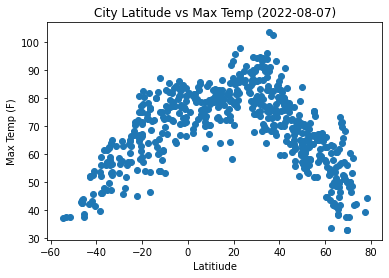

<Figure size 432x288 with 0 Axes>

In [8]:
plt.scatter(city_weather_pd['Lat'], city_weather_pd['Max Temp'])
plt.title('City Latitude vs Max Temp' + ' (' +str(datetime.now().date()) + ')')
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitiude")
plt.show()

# Save the figure:
plt.savefig('../output_data/LatitudeTemp')

This plot is looking at all latitudes across the world and how the location affects the max temperature. Generally, the closer to 0 latitude a human is the warmer the temperature. 

## Latitude vs. Humidity Plot

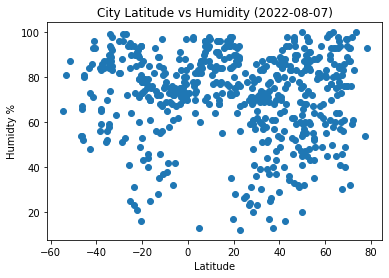

<Figure size 432x288 with 0 Axes>

In [9]:
plt.scatter(city_weather_pd['Lat'], city_weather_pd['Humidity'])
plt.title('City Latitude vs Humidity' + ' (' +str(datetime.now().date()) + ')')
plt.ylabel("Humidty %")
plt.xlabel("Latitude")
plt.show()

# Save the figure:
plt.savefig('../output_data/LatitudeHumid')

Here we are looking at the entire world again by latitude in comparison to the humidity %. Here there appears to be less of a correlation between latitude and humidity as the scatter plot shows data points with no real trend. 

## Latitude vs. Cloudiness Plot

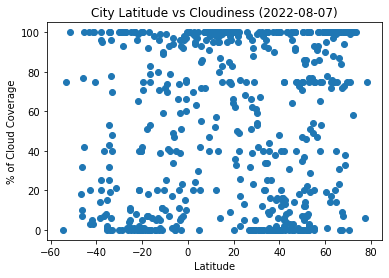

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(city_weather_pd['Lat'], city_weather_pd['Cloudiness'])
plt.title('City Latitude vs Cloudiness' + ' (' +str(datetime.now().date()) + ')')
plt.ylabel("% of Cloud Coverage")
plt.xlabel("Latitude")
plt.show()

# Save the figure:
plt.savefig('../output_data/LatitudeCloud')

Here we are looking at how latitude affects cloudiness % or the % of cloud coverage. Again, there is no real correlation or trend between the two as the data is shown to be pretty scattered. 

## Latitude vs. Wind Speed Plot

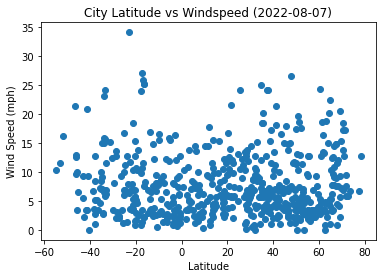

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(city_weather_pd['Lat'], city_weather_pd['Wind Speed'])
plt.title('City Latitude vs Windspeed' + ' (' +str(datetime.now().date()) + ')')
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.show()

# Save the figure:
plt.savefig('../output_data/LatitudeWind')

Lastly, here we are looking at how latitude affects wind speed in miles per hour. It appears that as you approach higher latitudes in the northern region, as latitude approaches 80, the more the wind speed increases. 

## Linear Regression

In [12]:
#First I need to split the data set into Northern and Southern hemispheres. According to Nat Geo, the Northern hemishere is anything greater that lat > 0 and the opposite for the southern hemisphere. (https://education.nationalgeographic.org/resource/hemisphere)
north_city_data = city_weather_pd[city_weather_pd['Lat'] >= 0]

south_city_data = city_weather_pd[city_weather_pd['Lat'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

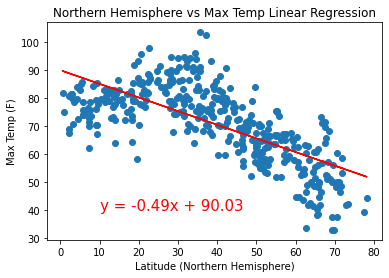

<Figure size 432x288 with 0 Axes>

In [13]:
#separating into x & y axis
x_axis = north_city_data['Lat']
y_axis = north_city_data['Max Temp']

#linear regression set up
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

#getting regression values/setting up linear regression line
regress_values = x_axis * slope + intercept
lin_reg = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

#plotting scatter plot & regression line
plt.scatter(x_axis, y_axis)
plt.plot(x_axis, regress_values, 'red')

#title & axis & linear regression equation
plt.title("Northern Hemisphere vs Max Temp Linear Regression")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.annotate(lin_reg,(10,40),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/NorthernLatitudeTemp')

In this plot we are looking at how latitude in the northern hemisphere affects the max temperature. The data and linear regression show that as you go more north, the cooler the weather becomes. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

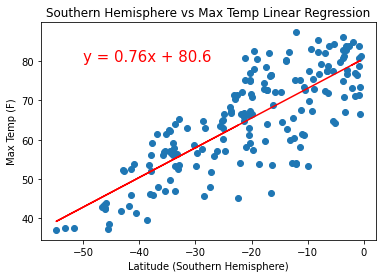

<Figure size 432x288 with 0 Axes>

In [14]:
#separating into x & y axis
x_axis2 = south_city_data['Lat']
y_axis2 = south_city_data['Max Temp']

#linear regression set up
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_axis2, y_axis2)

#getting regression values/setting up linear regression line
regress_values2 = x_axis2 * slope2 + intercept2
lin_reg2 = 'y = ' + str(round(slope2,2)) + 'x + ' + str(round(intercept2,2))

#plotting scatter plot & regression line
plt.scatter(x_axis2, y_axis2)
plt.plot(x_axis2, regress_values2, 'red')

#title & axis & linear regression equation
plt.title("Southern Hemisphere vs Max Temp Linear Regression")
plt.ylabel("Max Temp (F)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.annotate(lin_reg2,(-50,80),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/SouthernLatitudeTemp')

Here we are again looking at how latitude affects the max temperature but in the southern hemisphere. As the latitude increases, goes to closer to 0, the max temp also increases which is shown by the scatter plot and linear regression. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

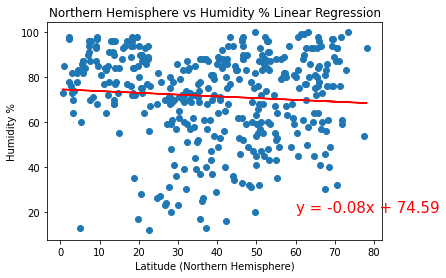

<Figure size 432x288 with 0 Axes>

In [15]:
x_axis = north_city_data['Lat']
y_axis3 = north_city_data['Humidity']

#linear regression set up
(slope3, intercept3, rvalue3, pvalue3, stderr3) = linregress(x_axis, y_axis3)

#getting regression values/setting up linear regression line
regress_values3 = x_axis * slope3 + intercept3
lin_reg3 = 'y = ' + str(round(slope3,2)) + 'x + ' + str(round(intercept3,2))

#plotting scatter plot & regression line
plt.scatter(x_axis, y_axis3)
plt.plot(x_axis, regress_values3, 'red')

#title & axis & linear regression equation
plt.title("Northern Hemisphere vs Humidity % Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.annotate(lin_reg3,(60,20),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/NorthernLatitudeHumid')

In this plot we are looking at the latitudes of the northern hemisphere and how it affects the humidity. There appears to be no real relation between the two which is why the slope is very close to 0. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

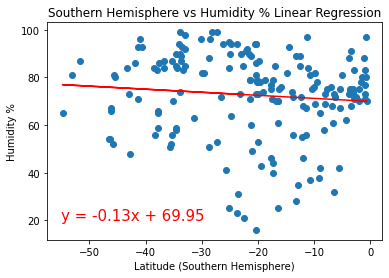

<Figure size 432x288 with 0 Axes>

In [16]:
x_axis2 = south_city_data['Lat']
y_axis4 = south_city_data['Humidity']

#linear regression set up
(slope4, intercept4, rvalue4, pvalue4, stderr4) = linregress(x_axis2, y_axis4)

#getting regression values/setting up linear regression line
regress_values4 = x_axis2 * slope4 + intercept4
lin_reg4 = 'y = ' + str(round(slope4,2)) + 'x + ' + str(round(intercept4,2))

#plotting scatter plot & regression line
plt.scatter(x_axis2, y_axis4)
plt.plot(x_axis2, regress_values4, 'red')

#title & axis & linear regression equation
plt.title("Southern Hemisphere vs Humidity % Linear Regression")
plt.ylabel("Humidity %")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.annotate(lin_reg4,(-55,20),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/SouthernLatitudeTemp')

Here we are again looking at how latitude affects humidty, but this time in the southern hemisphere. There appears to be more of a correlation between the two than in the northern hemisphere, but overall the data shows a very small relation between the humidity and latitude. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

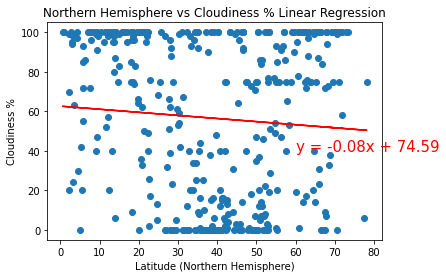

<Figure size 432x288 with 0 Axes>

In [17]:
x_axis = north_city_data['Lat']
y_axis5 = north_city_data['Cloudiness']

#linear regression set up
(slope5, intercept5, rvalue5, pvalue5, stderr5) = linregress(x_axis, y_axis5)

#getting regression values/setting up linear regression line
regress_values5 = x_axis * slope5 + intercept5
lin_reg5 = 'y = ' + str(round(slope5,2)) + 'x + ' + str(round(intercept5,2))

#plotting scatter plot & regression line
plt.scatter(x_axis, y_axis5)
plt.plot(x_axis, regress_values5, 'red')

#title & axis & linear regression equation
plt.title("Northern Hemisphere vs Cloudiness % Linear Regression")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.annotate(lin_reg3,(60,40),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/NorthernLatitudeCloud')

In this plot we are looking at how latitude affects the cloudiness in the northern hemisphere. The data is very scattered and there is a very weak relationship between the two variables, which again is why the slope of the regression line is so close to 0. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

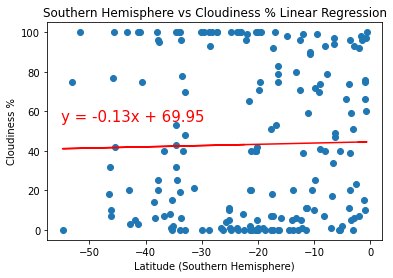

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis2 = south_city_data['Lat']
y_axis6 = south_city_data['Cloudiness']

#linear regression set up
(slope6, intercept6, rvalue6, pvalue6, stderr6) = linregress(x_axis2, y_axis6)

#getting regression values/setting up linear regression line
regress_values6 = x_axis2 * slope6 + intercept6
lin_reg6 = 'y = ' + str(round(slope6,2)) + 'x + ' + str(round(intercept6,2))

#plotting scatter plot & regression line
plt.scatter(x_axis2, y_axis6)
plt.plot(x_axis2, regress_values6, 'red')

#title & axis & linear regression equation
plt.title("Southern Hemisphere vs Cloudiness % Linear Regression")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.annotate(lin_reg4,(-55,55),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/SouthernLatitudeCloud')

Here we are looking at the southern hemisphere latitudes and how they affect the cloudiness. This plot again shows a stronger relationship than the northern hemisphere between the two variables but this relationship is not all that strong. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

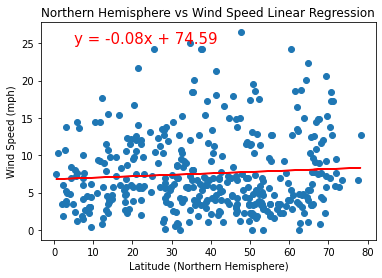

<Figure size 432x288 with 0 Axes>

In [21]:
x_axis = north_city_data['Lat']
y_axis7 = north_city_data['Wind Speed']

#linear regression set up
(slope7, intercept7, rvalue7, pvalue7, stderr7) = linregress(x_axis, y_axis7)

#getting regression values/setting up linear regression line
regress_values7 = x_axis * slope7 + intercept7
lin_reg7 = 'y = ' + str(round(slope7,2)) + 'x + ' + str(round(intercept7,2))

#plotting scatter plot & regression line
plt.scatter(x_axis, y_axis7)
plt.plot(x_axis, regress_values7, 'red')

#title & axis & linear regression equation
plt.title("Northern Hemisphere vs Wind Speed Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Northern Hemisphere)")
plt.annotate(lin_reg3,(5,25),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/NorthernLatitudeWind')

In this plot we are looking at the relationship between the latitude in the northern hemisphere and the windspeed. There doesnt appear to be too strong of a relationship although the data is grouped towards lower windspeeds as a whole. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

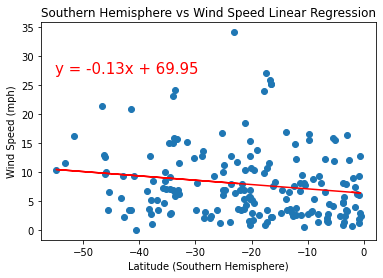

<Figure size 432x288 with 0 Axes>

In [22]:
x_axis2 = south_city_data['Lat']
y_axis8 = south_city_data['Wind Speed']

#linear regression set up
(slope8, intercept8, rvalue8, pvalue8, stderr8) = linregress(x_axis2, y_axis8)

#getting regression values/setting up linear regression line
regress_values8 = x_axis2 * slope8 + intercept8
lin_reg8 = 'y = ' + str(round(slope8,2)) + 'x + ' + str(round(intercept8,2))

#plotting scatter plot & regression line
plt.scatter(x_axis2, y_axis8)
plt.plot(x_axis2, regress_values8, 'red')

#title & axis & linear regression equation
plt.title("Southern Hemisphere vs Wind Speed Linear Regression")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude (Southern Hemisphere)")
plt.annotate(lin_reg4,(-55,27),fontsize=15,color="red")
plt.show()

# Save the figure:
plt.savefig('../output_data/SouthernLatitudeWind')

And lastly, we are looking at a plot showing the relationship between the latitude in the southern hemisphere and windwpeed. As you approach 0 degrees, or the equator the wind speed decreases, but it is not all that strong of a relationship. 